# An Introduction to Neural Networks

import your libraries:

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 

## Loading the Data 

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


- __'keras.datasets.mnist.load_data()'__ - a built-in utility in Keras for loading the MNIST dataset. It retrieves the dataset from its online source if it's not already downloaded or loads it directly if it's present locally

- __load_data()__ function returns two tuples: 
    - __(X_train, y_train)__ contains the training data __(X_train)__ and the training labels __(y_train)__ 
    - __(X_test, y_test)__ contains the training data __(X_test)__ and the training labels __(y_test)__ 

About the training and testing data: 

- __X_train__ and __X_test__ are arrays of images, where each image is represented as a 28 x 28 matrix of pixel values 
- __y_train__ and __y_test__ are arrays of corresponding labels, indicating the digit that each image represents 

Something noteworthy: 

- The __load_data()__ function from __keras.datasets__ for standard datasets, including MNIST, typically returns two tuples: one for the training data and one for the test data.



In [55]:
print(f'The length of the training set is {len(X_train)}')
print(f'The length of the test set is {len(X_test)}')

The length of the training set is 60000
The length of the test set is 10000


#### One image is represented as a 2D array that is 28 pixels by 28 pixels

In [6]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Let's take a look at some of the sample images in our training set

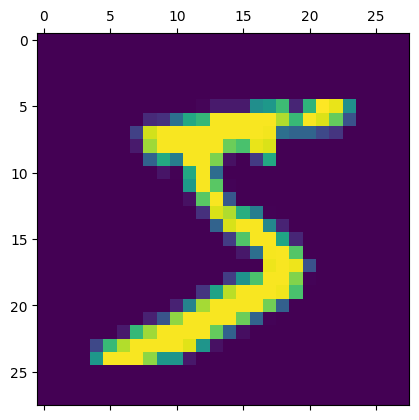

In [9]:
plt.matshow(X_train[0])

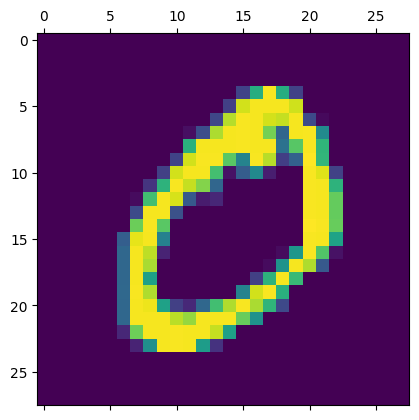

In [10]:
plt.matshow(X_train[1])

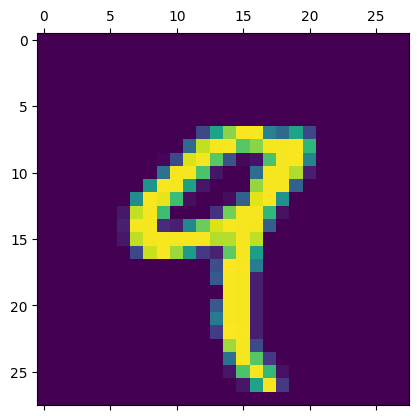

In [11]:
plt.matshow(X_train[4])

Let's now look at some of the labels attached to each of these photos

In [13]:
#shows the label at index 4 
y_train[4]

9

In [ ]:
#shows the labels from index 0 to 4
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Flatten and scaling our training data set 

In [24]:
#Sets all the pixel values to be between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train.shape

(60000, 28, 28)

#### Why do we reshape our data?
 
 The MNIST dataset images, originally in a 2D format (28x28 pixels), are being reshaped into 1D arrays of 784 elements each. This transformation is necessary because many machine learning models, especially basic neural networks, require input data in a flattened, 1D format where each pixel is treated as an individual feature. This process converts the 2D image data into a format suitable for these models.








In [25]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [26]:
print (X_train_flattened.shape)
print (X_test_flattened.shape)

(60000, 784)
(10000, 784)


### Creating a simple Neutal Network (with just an input layer and an output layer)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4683 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.9141
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9260


In [28]:
#In this case, this retuns a two element list. 
#The first element is always the loss of the model from our data (in this case test data)
#The second element is the first metric we used, so in this case 'accuracy'
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.9244


[0.26934731006622314, 0.9243999719619751]

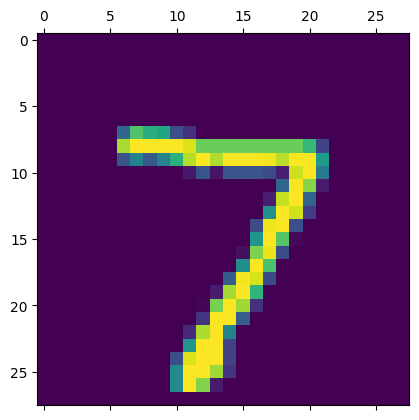

In [30]:
plt.matshow(X_test[0])

The code snippet below performs a prediction using our trained neural network model on the flattened test dataset __(X_test_flattened)__ and then accesses the prediction result for the first sample in the test set. 

Specifically, __model.predict(X_test_flattened)__ generates predictions for each entry in __X_test_flattened__, and __y_predicted[0]__ retrieves the prediction array for the very first image in the test dataset.

In [31]:
#Applies our model to all of our testing data
#Returns an array, containing the probabilites of each class, or number in this case
#We access the first element, for the first number 
#We then are returned an array of the probabilities of each number, from our model
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.2173937e-02, 2.4657180e-07, 6.2577493e-02, 9.6120328e-01,
       2.0827765e-03, 1.1501710e-01, 1.9745178e-06, 9.9977839e-01,
       1.0074665e-01, 5.7632422e-01], dtype=float32)

In [32]:
np.argmax(y_predicted[0])

7

## Creating a Confusion Matrix

A __confusion matrix__ is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. It allows you to visualize the accuracy of the model and the types of errors it makes.

In [41]:
tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [10000] != values[1].shape = [10000,10] [Op:Pack] name: stack

### Why an error?
We're getting this error because right now the labels of y_test are whole numbers, while y_predicted are in decimal values. We need to change y_predicted so it has labels attached to each value

In [34]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [35]:
y_predicted

array([[2.2173937e-02, 2.4657180e-07, 6.2577493e-02, ..., 9.9977839e-01,
        1.0074665e-01, 5.7632422e-01],
       [5.4687941e-01, 7.3348228e-03, 9.9942636e-01, ..., 1.0252223e-12,
        1.7688300e-01, 2.4889208e-09],
       [4.9202924e-04, 9.9426955e-01, 7.1847087e-01, ..., 2.2325288e-01,
        4.8406994e-01, 4.9907796e-02],
       ...,
       [4.5764591e-06, 3.4288914e-06, 2.3386846e-03, ..., 4.3324631e-01,
        5.5959952e-01, 7.1650881e-01],
       [1.5201361e-04, 1.7876357e-04, 2.7127305e-04, ..., 8.2159895e-05,
        6.5571165e-01, 1.0241992e-04],
       [1.0094279e-02, 4.9316012e-10, 3.3119985e-01, ..., 2.2425404e-08,
        2.4164576e-04, 6.3875132e-07]], dtype=float32)

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [43]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    5,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  919,   23,    8,    2,   13,   10,   40,    3],
       [   2,    0,   15,  935,    0,   16,    2,   12,   23,    5],
       [   1,    1,    7,    2,  911,    0,    9,    7,   11,   33],
       [   9,    2,    4,   44,    8,  762,   12,    7,   38,    6],
       [  10,    3,    8,    1,    7,   12,  912,    2,    3,    0],
       [   1,    5,   21,    4,    6,    1,    0,  965,    4,   21],
       [   6,    7,    6,   25,    9,   25,    9,   14,  870,    3],
       [   9,    7,    2,   12,   26,    6,    0,   40,   11,  896]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

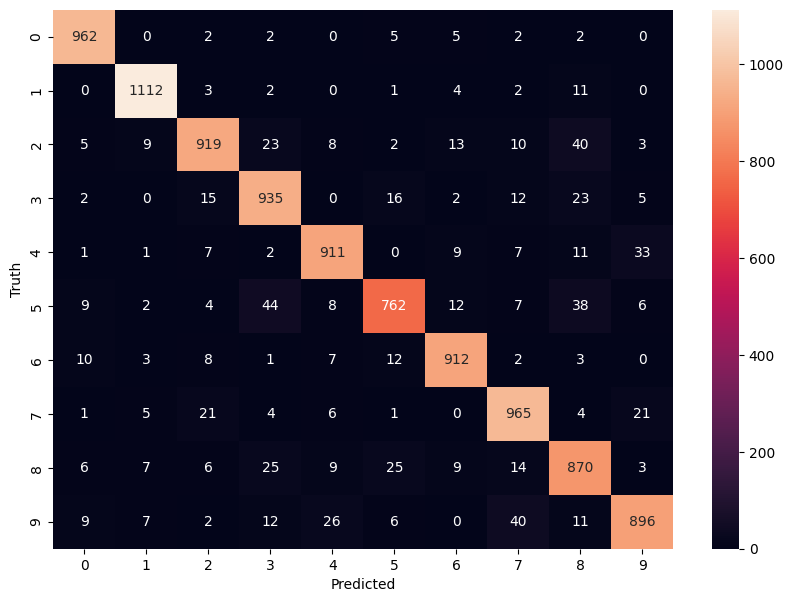

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding Hidden Layers

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0914 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0688 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9832


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9736


[0.0832282230257988, 0.9735999703407288]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

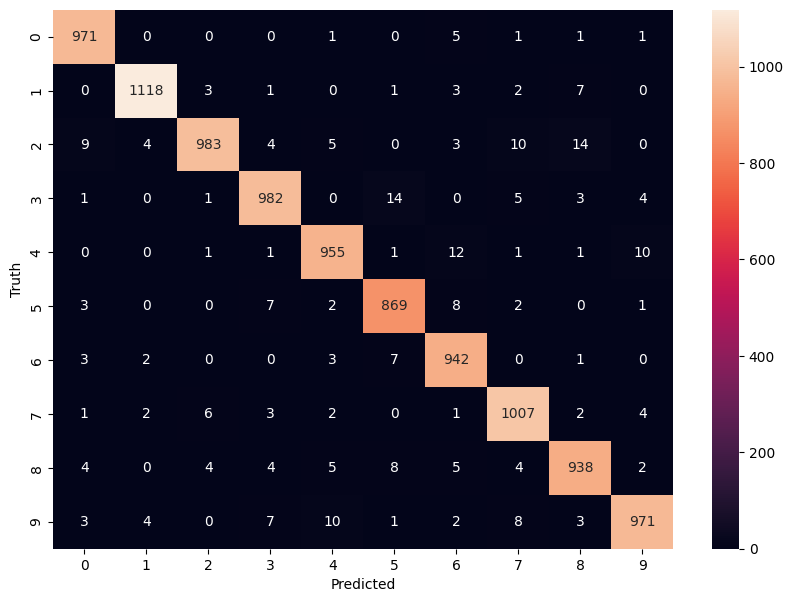

In [48]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### What if I don't want to manually flatten my 2-D array first?

Keras has a built in function for doing so!

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0424 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

## Ending thoughts

Great! We now have applied and coded our first real Neural Network. Very exciting stuff!

 I got the inspiration for this project from codebasics [here](https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7)